<a href="https://colab.research.google.com/github/Ganesh7764/digit-recognition/blob/master/digital_handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install -r https://raw.githubusercontent.com/Lasagne/Lasagne/v0.1/requirements.txt


  Cloning https://github.com/Theano/Theano.git (to revision 15c90dd3) to /tmp/pip-install-TumET7/Theano
  Running command git clone -q https://github.com/Theano/Theano.git /tmp/pip-install-TumET7/Theano
  Running command git checkout -q 15c90dd3
  Created wheel for Theano: filename=Theano-0.7.0-cp27-none-any.whl size=2028394 sha256=fa088419fb0b011570338d658827d2346b130fe0728363c49275ffa4fe723c66
  Stored in directory: /tmp/pip-ephem-wheel-cache-p1qWPH/wheels/59/d8/78/0702971172890b64bbbf9ced87c8649aae75b8c04d29be0ac8
Successfully built Theano
ERROR: pymc3 3.6 has requirement theano>=1.0.0, but you'll have theano 0.7.0 which is incompatible.
  Found existing installation: Theano 1.0.4
    Uninstalling Theano-1.0.4:
      Successfully uninstalled Theano-1.0.4


In [0]:
pip install lasagne==0.1

     |████████████████████████████████| 133kB 7.4MB/s 
  Created wheel for lasagne: filename=Lasagne-0.1-cp27-none-any.whl size=79274 sha256=ad12e669d1c9735a1debf1e05c2486f6425293513b8ab9de1147aa11c568f6be
  Stored in directory: /root/.cache/pip/wheels/a5/8e/31/b4cae7e5507f8582e77d7f5cf2815be8820ccacfa0519ca60c
Successfully built lasagne


In [0]:
pip install -U numpy


     |████████████████████████████████| 17.0MB 189kB/s 
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 1.15.0 which is incompatible.
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.4.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
ERROR: pymc3 3.6 has requirement theano>=1.0.0, but you'll have theano 0.7.0 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


In [0]:
pip install Pillow

In [0]:
import numpy as np

def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
  print ("Downloading ",filename)
  import urllib #to download file from url
  urllib.urlretrieve(source+filename,filename)

import gzip #to unzip
import os #get the user environment


def load_mnist_images(filename):
  if not os.path.exists(filename): #checks current directory for the existance of the file
    download(filename)

  with gzip.open(filename,'rb') as f:
    data = np.frombuffer(f.read(),np.uint8,offset=16)



    data=data.reshape(-1,1,28,28)

    return data/np.float32(256)


def load_mnist_labels(filename):
  if not os.path.exists(filename):
    download(filename)

  with gzip.open(filename,'rb') as f:
    data = np.frombuffer(f.read(),np.uint8,offset=8)

    return data


X_train = load_mnist_images('train-images-idx3-ubyte.gz')
Y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
X_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
Y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')


('Downloading ', 'train-images-idx3-ubyte.gz')
('Downloading ', 'train-labels-idx1-ubyte.gz')
('Downloading ', 't10k-images-idx3-ubyte.gz')
('Downloading ', 't10k-labels-idx1-ubyte.gz')


In [0]:
import theano
import theano.tensor as T
import lasagne


def build_NN(input_var = None):


	l_in = lasagne.layers.InputLayer(shape=(None,1,28,28),input_var=input_var)


	l_in_drop = lasagne.layers.DropoutLayer(l_in,p=0.1)


	l_hid1 = lasagne.layers.DenseLayer(l_in_drop,num_units=800,
		nonlinearity=lasagne.nonlinearities.rectify,
		W = lasagne.init.GlorotUniform())



	l_hid1_drop = lasagne.layers.DropoutLayer(l_hid1,p=0.5)


	l_hid2 = lasagne.layers.DenseLayer(l_hid1_drop, num_units=800,
		nonlinearity=lasagne.nonlinearities.rectify,
		W=lasagne.init.GlorotUniform())
	
	l_hid2_drop = lasagne.layers.DropoutLayer(l_hid2,p=0.5)
	


	l_out = lasagne.layers.DenseLayer(l_hid2_drop,num_units=10,
		nonlinearity = lasagne.nonlinearities.softmax)
	return l_out

 	
input_var = T.tensor4('inputs') #empty 4 dimentional array
target_var = T.ivector('targets') 

network = build_NN(input_var)#call the function that initializes the neural network

prediction = lasagne.layers.get_output(network)
loss = lasagne.objectives.categorical_crossentropy(prediction,target_var)


loss = loss.mean()



params = lasagne.layers.get_all_params(network,trainable=True)

updates = lasagne.updates.nesterov_momentum(loss, params, learning_rate=0.01, momentum = 0.9)


train_fn = theano.function([input_var,target_var], loss, updates=updates)

import matplotlib
#matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
#plt.show(plt.imshow(X_test[0][0]))
#print(X_test[0][0])

#now we will feed the training data to the neural network
num_training_steps = 20

for step in range (num_training_steps):
	train_err = train_fn(X_train, Y_train)
	print ("current step is "+str(step))


current step is 0
current step is 1
current step is 2
current step is 3
current step is 4
current step is 5
current step is 6
current step is 7
current step is 8
current step is 9
current step is 10
current step is 11
current step is 12
current step is 13
current step is 14
current step is 15
current step is 16
current step is 17
current step is 18
current step is 19


Saving image.png to image (2).png


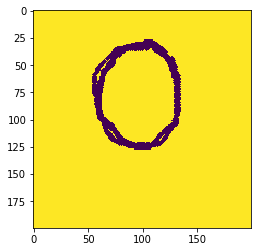

In [0]:
from google.colab import files
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

uploaded = files.upload()

image = Image.open(BytesIO(uploaded['image.png'])).convert('L')

plt.imshow(image)
plt.show()
#im = np.array(im)


In [0]:
im = image.resize((28,28))
im = np.array(im)
# print(im)
# print(im.shape)
im1 = im.reshape((1,1,28,28))

In [0]:
print(im1.shape)

(1, 1, 28, 28)


In [0]:
test_prediction = lasagne.layers.get_output(network)
val_fn = theano.function([input_var],test_prediction)
scores = val_fn(im1).tolist() #this will apply the function on 1 image, the first one in the text set
print scores

[[1.0, 9.69919885571714e-259, 0.0, 0.0, 0.0, 0.0, 0.0, 9.100662510926083e-282, 0.0, 1.2671242319631813e-137]]


In [0]:
print scores[0].index(max(scores[0]))

0


In [0]:
test_prediction = lasagne.layers.get_output(network, deterministic=True)
test_acc = T.mean(T.eq(T.argmax(test_prediction, axis=1),target_var),dtype=theano.config.floatX)
acc_fn = theano.function([input_var,target_var],test_acc)
print ("Accuracy is: ")
print acc_fn(X_test,Y_test)



Accuracy is: 
0.736
